<a href="https://colab.research.google.com/github/fufi-tuti/dataMiningprj/blob/main/DTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import pickle
import numpy as np



In [51]:
df=pd.read_csv("final_selected_data.csv")
print(df.head)

<bound method NDFrame.head of        Have you ever had suicidal thoughts ?  Financial Stress  Depression
0                                        1.0               0.0           1
1                                        0.0               1.0           0
2                                        0.0               0.0           0
3                                        1.0               5.0           1
4                                        1.0               0.0           0
...                                      ...               ...         ...
27873                                    1.0               0.0           0
27874                                    0.0               2.0           0
27875                                    0.0               1.0           0
27876                                    1.0               5.0           1
27877                                    1.0               2.0           1

[27878 rows x 3 columns]>


In [52]:
fn=df.keys().to_list() [:-1]
X = df[fn]  # Features
y = df['Depression']


In [53]:
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(X, y, test_size=0.2, random_state=42)

In [54]:
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(X, y, test_size=0.3, random_state=42)


In [55]:
X_train_40, X_test_40, y_train_40, y_test_40 = train_test_split(X, y, test_size=0.4, random_state=42)


Accuracy (20% test): 0.781025824964132
[[1545  771]
 [ 450 2810]]


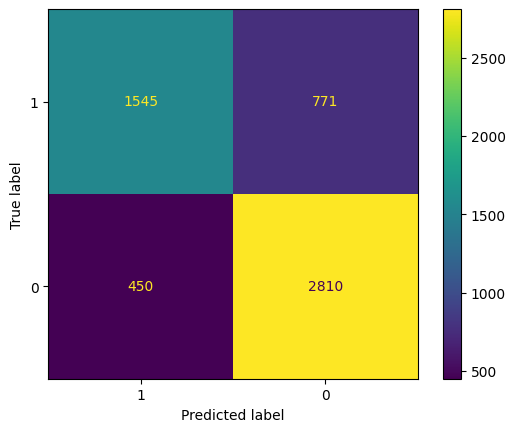

In [56]:

# Split 1: Test Size = 20%
clf_20 = DecisionTreeClassifier(criterion="entropy")
clf_20.fit(X_train_20, y_train_20)
y_pred_20 = clf_20.predict(X_test_20)

print("Accuracy (20% test):", metrics.accuracy_score(y_test_20, y_pred_20))

cm_20 = confusion_matrix(y_test_20, y_pred_20)
print(cm_20)

cn = [str(c) for c in df['Depression'].unique()]
disp = ConfusionMatrixDisplay.from_estimator(clf_20, X_test_20, y_test_20, display_labels=cn)


Accuracy (30% test): 0.7769010043041606
[[2328 1163]
 [ 703 4170]]


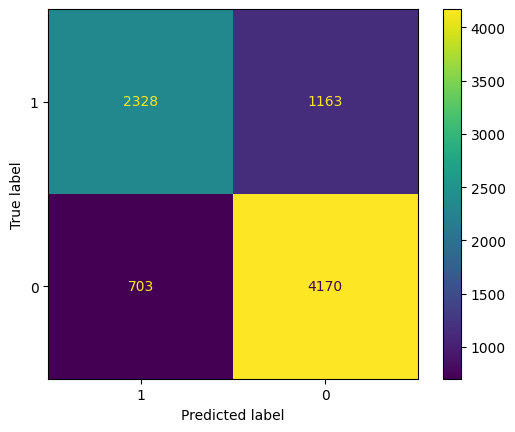

In [57]:

# Split 1: Test Size = 30%

clf_30 = DecisionTreeClassifier(criterion="entropy")
clf_30.fit(X_train_30, y_train_30)
y_pred_30 = clf_30.predict(X_test_30)

print("Accuracy (30% test):", metrics.accuracy_score(y_test_30, y_pred_30))

cm_30 = confusion_matrix(y_test_30, y_pred_30)
print(cm_30)

cn = [str(c) for c in df['Depression'].unique()]
disp = ConfusionMatrixDisplay.from_estimator(clf_30, X_test_30, y_test_30, display_labels=cn)


Accuracy (40% test): 0.773045193687231
[[2784 1899]
 [ 632 5837]]


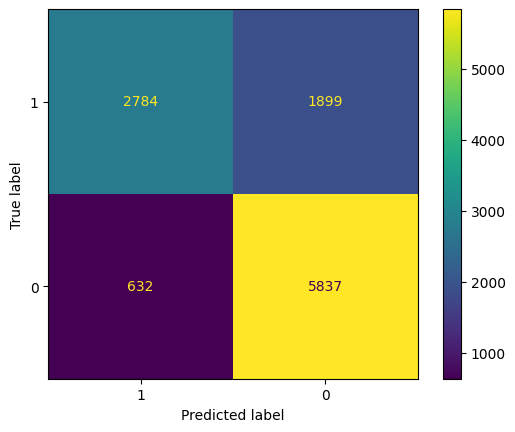

In [58]:

# Split 1: Test Size = 40%

clf_40 = DecisionTreeClassifier(criterion="entropy")
clf_40.fit(X_train_40, y_train_40)
y_pred_40 = clf_40.predict(X_test_40)

print("Accuracy (40% test):", metrics.accuracy_score(y_test_40, y_pred_40))

cm_40 = confusion_matrix(y_test_40, y_pred_40)
print(cm_40)

cn = [str(c) for c in df['Depression'].unique()]
disp = ConfusionMatrixDisplay.from_estimator(clf_40, X_test_40, y_test_40, display_labels=cn)



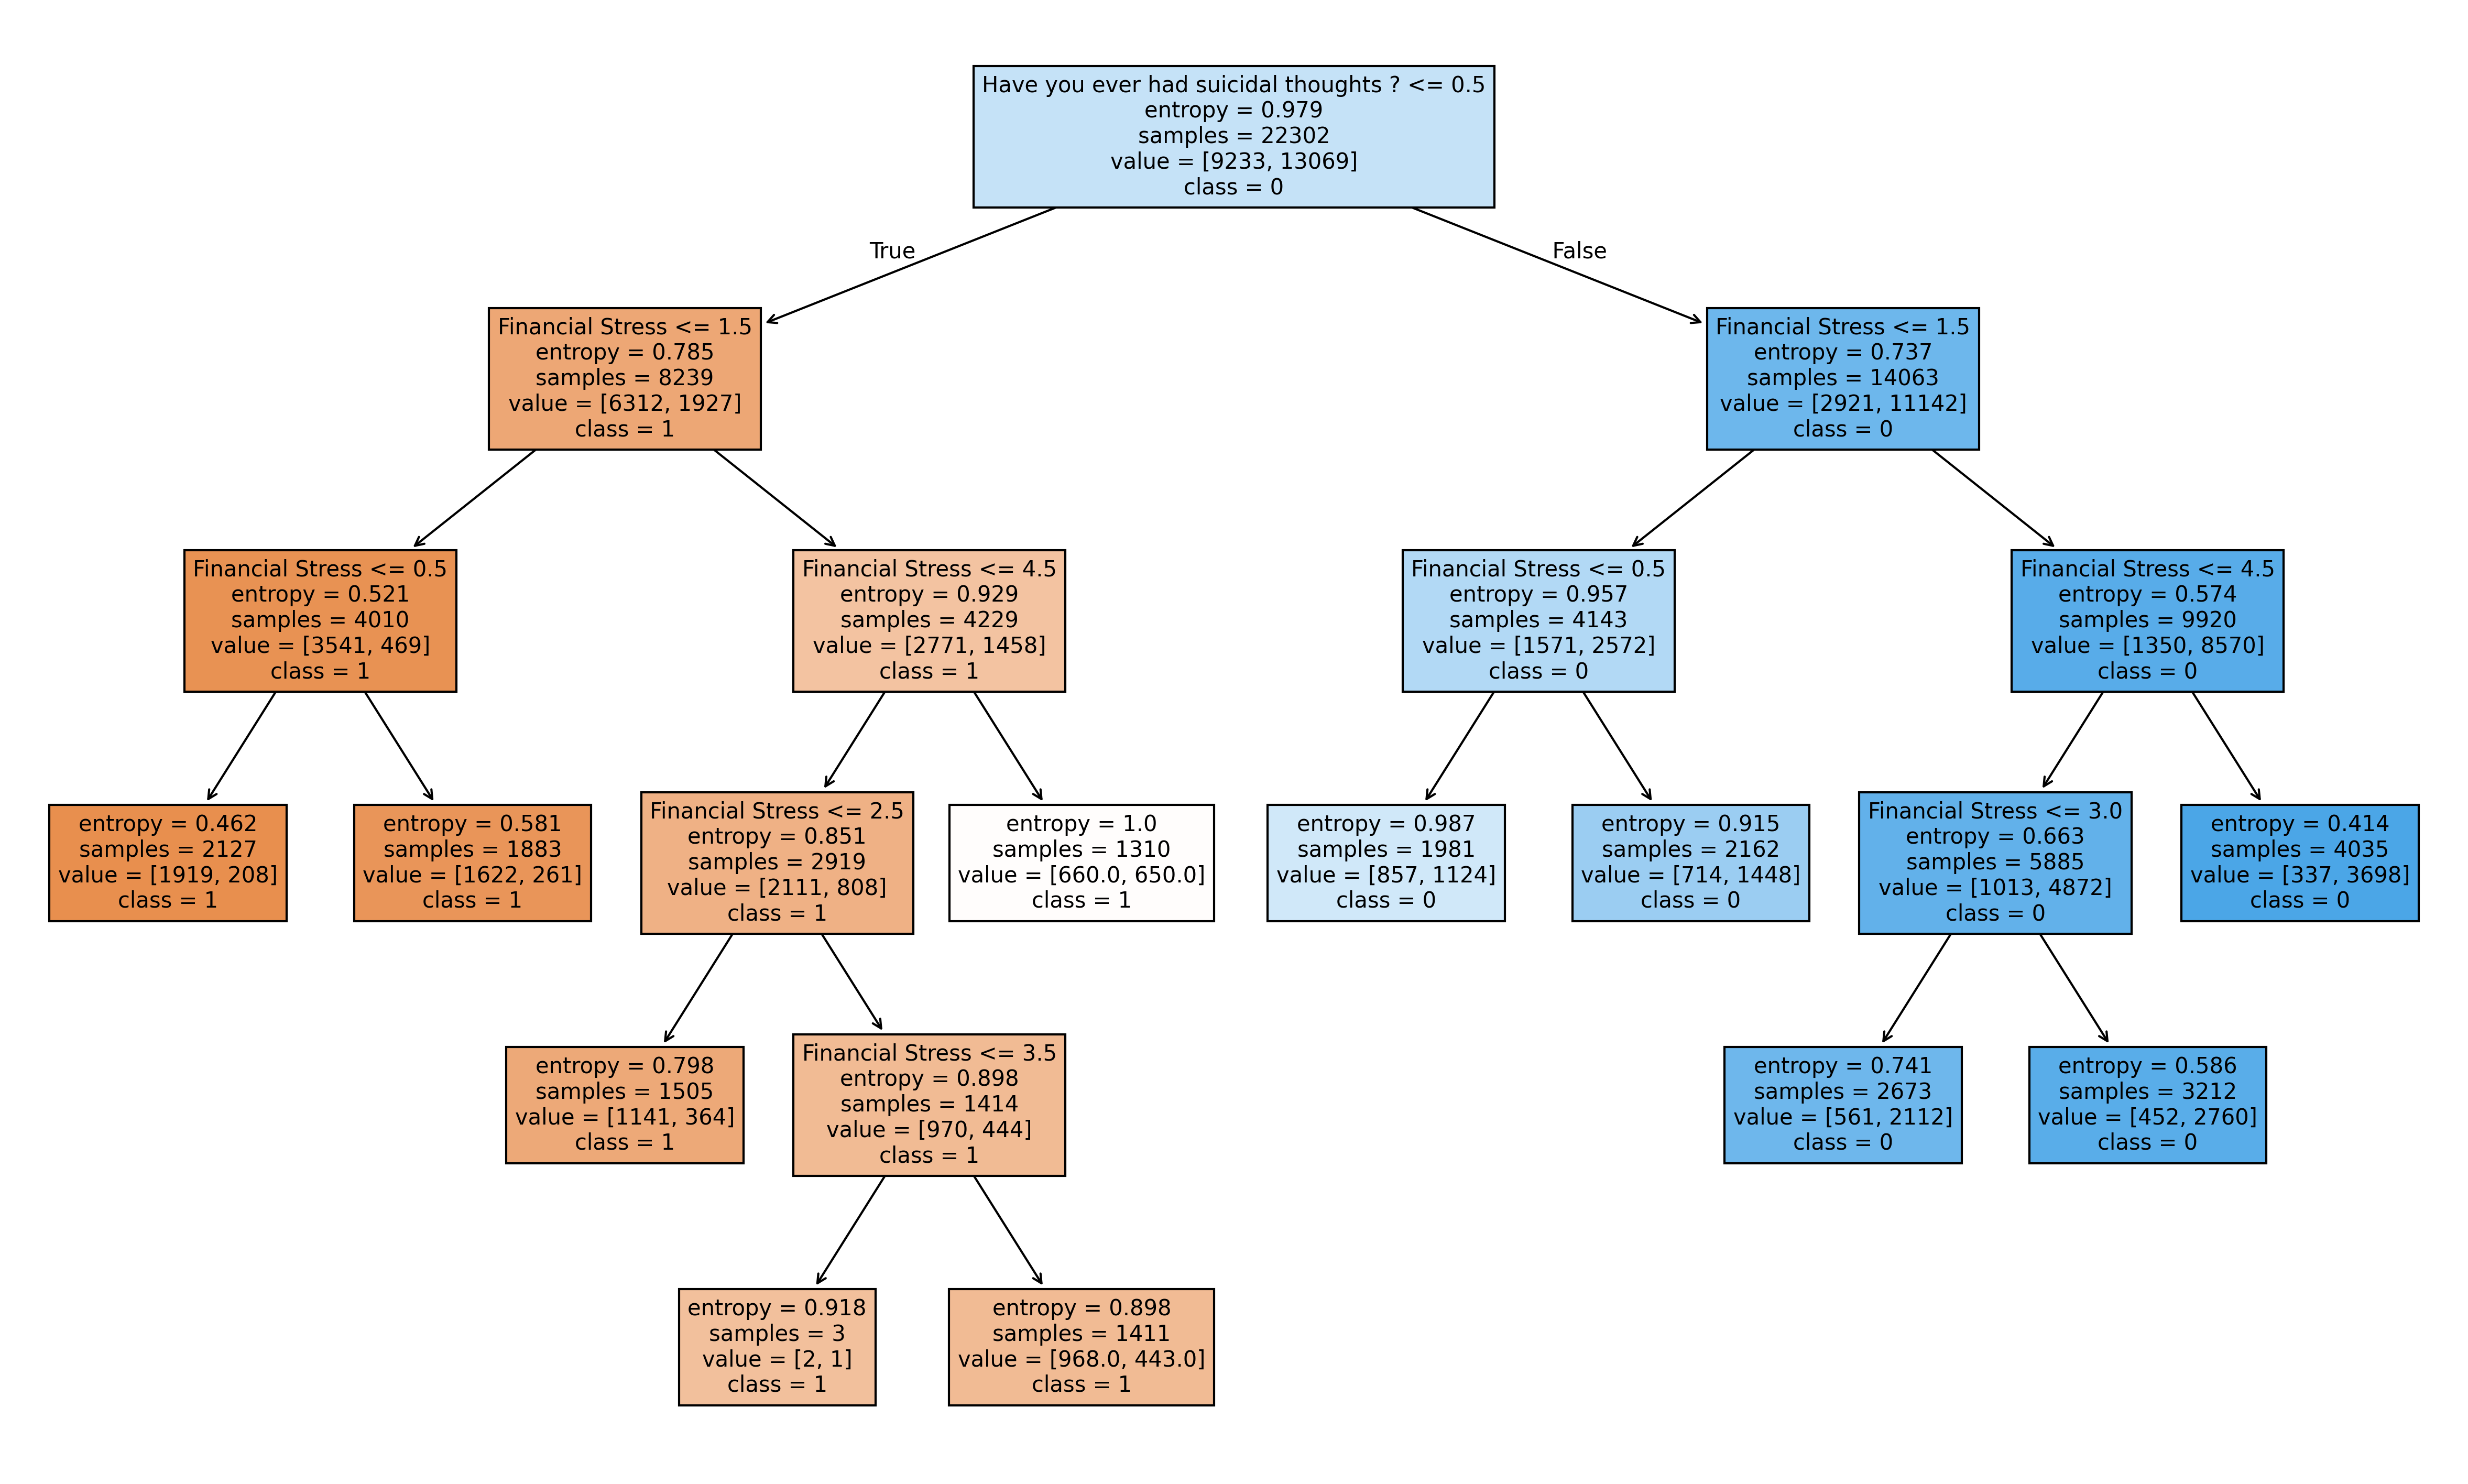

In [59]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), dpi=300)
tree.plot_tree(clf_20, feature_names=fn, class_names=cn, filled=True, fontsize=10)
fig.savefig('Depression_tree_20.png')
plt.show()


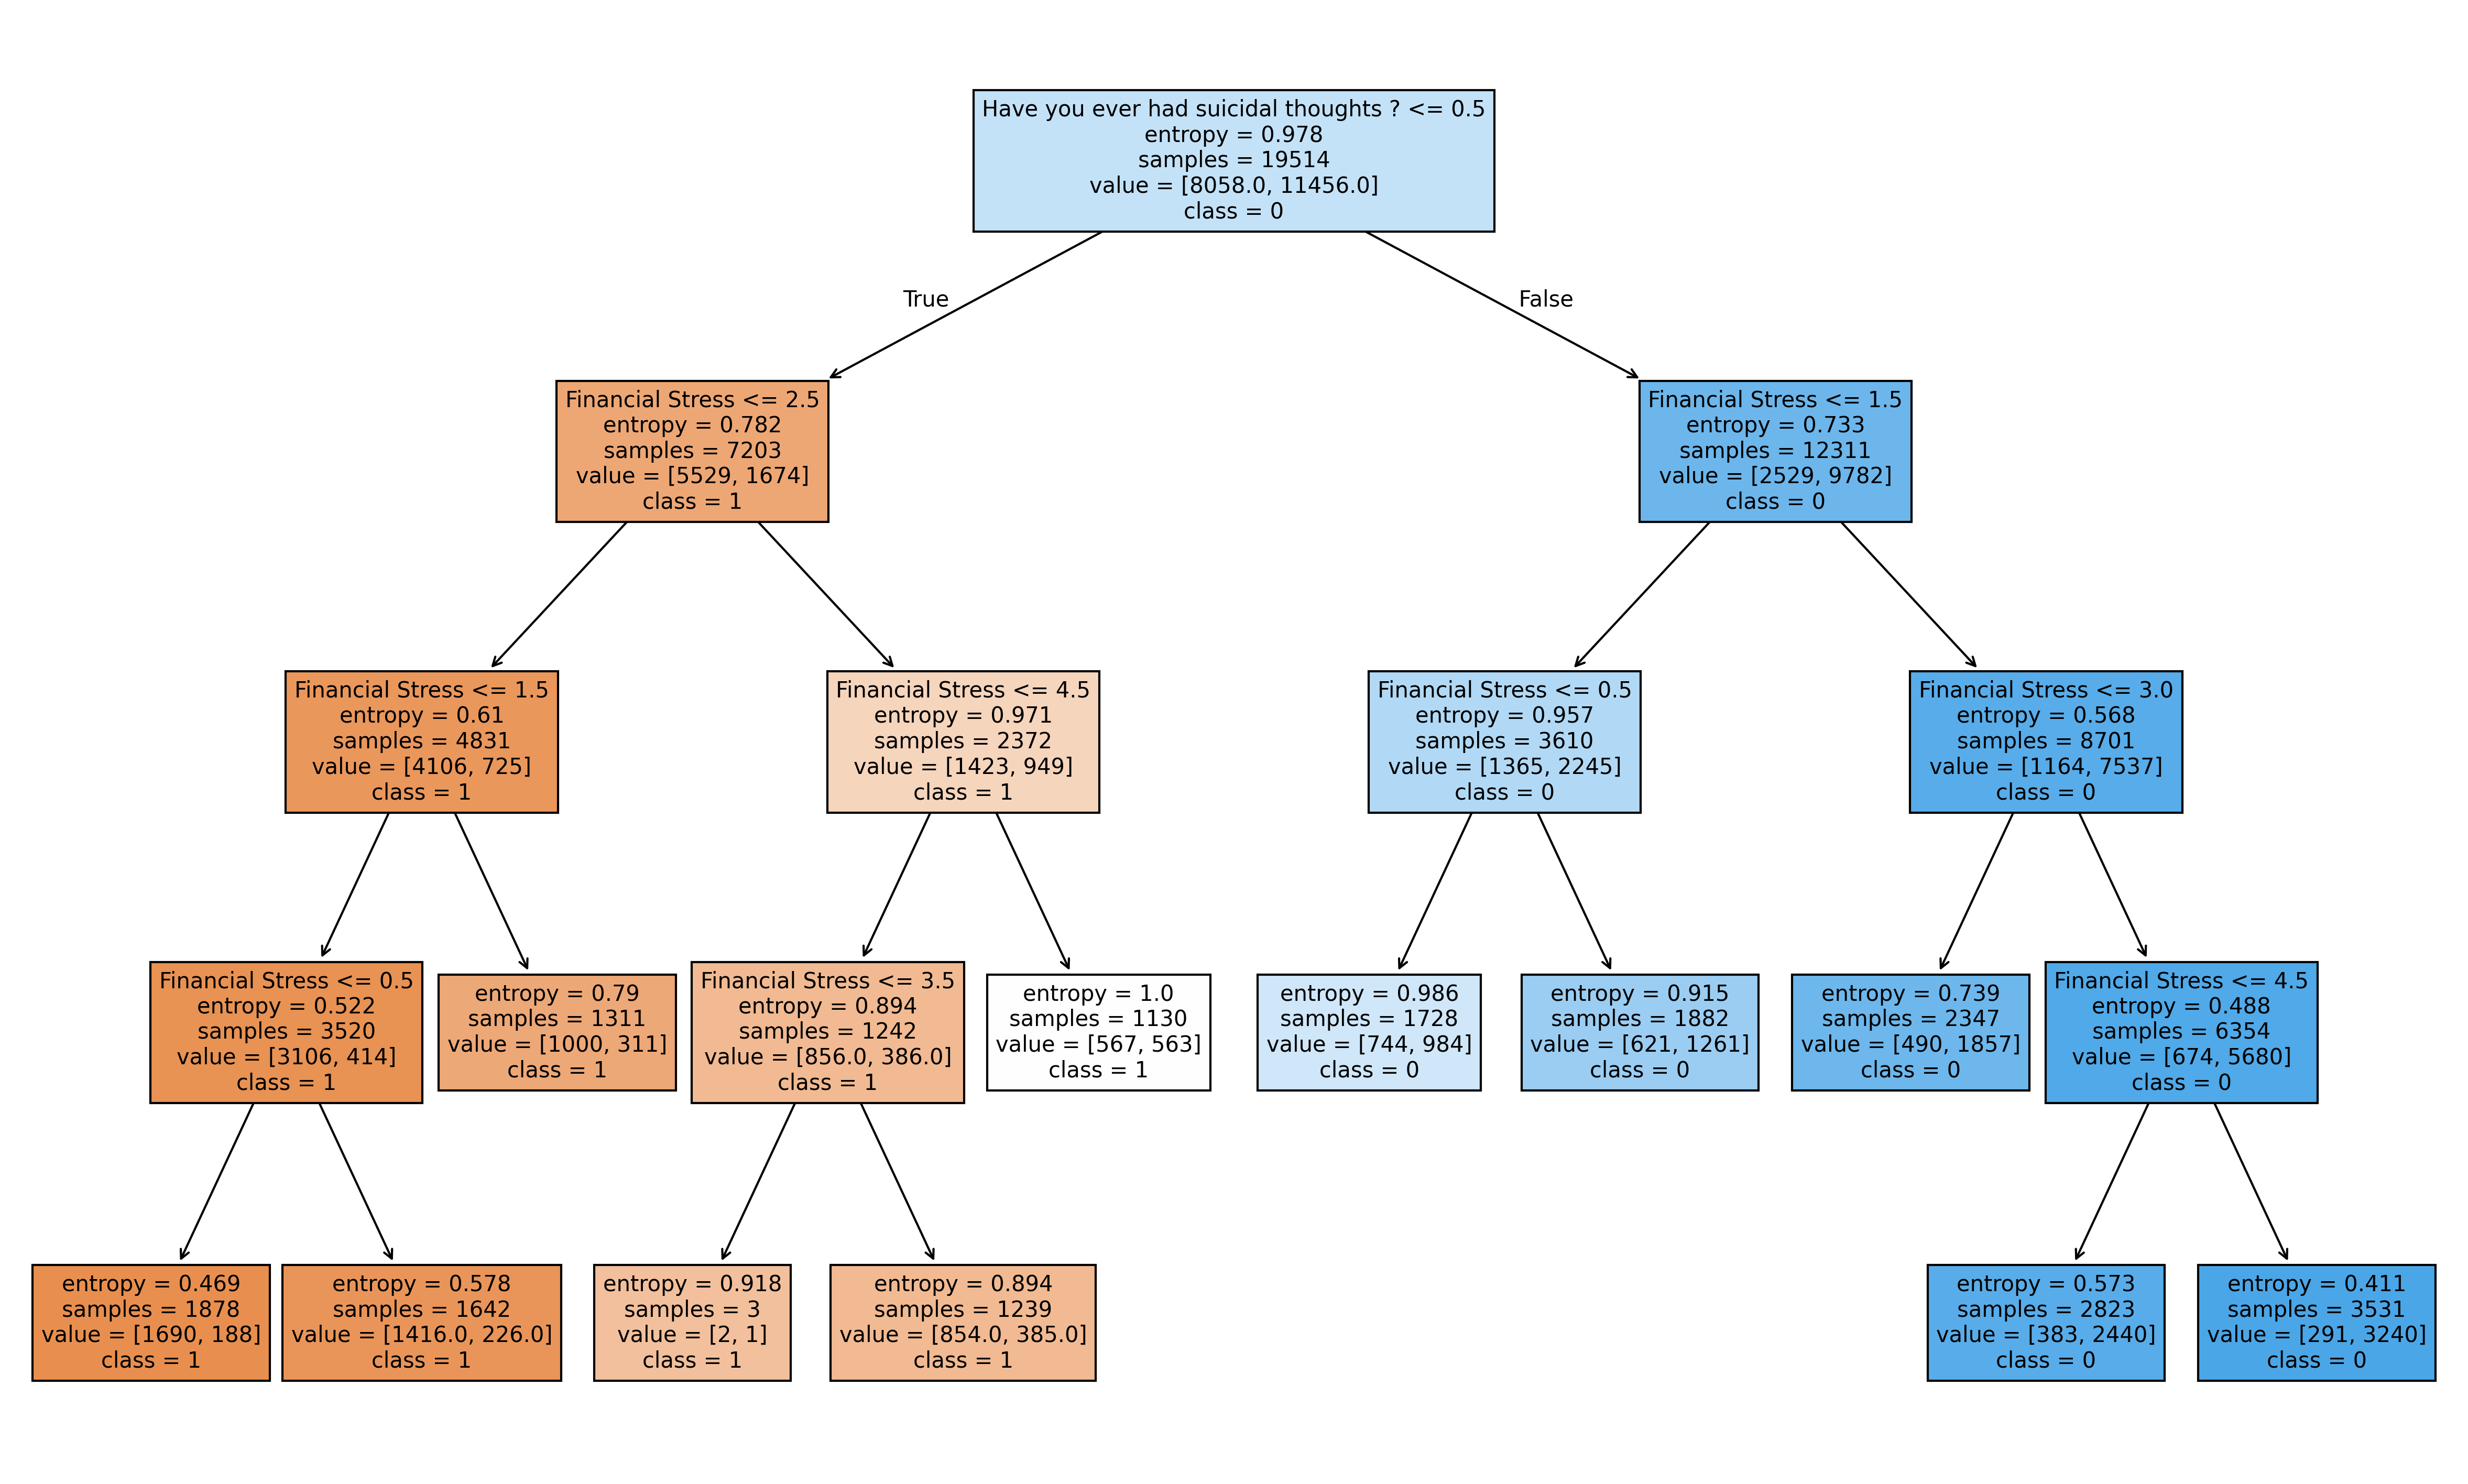

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), dpi=300)
tree.plot_tree(clf_30, feature_names=fn, class_names=cn, filled=True, fontsize=10)
fig.savefig('Depression_tree_30.png')
plt.show()


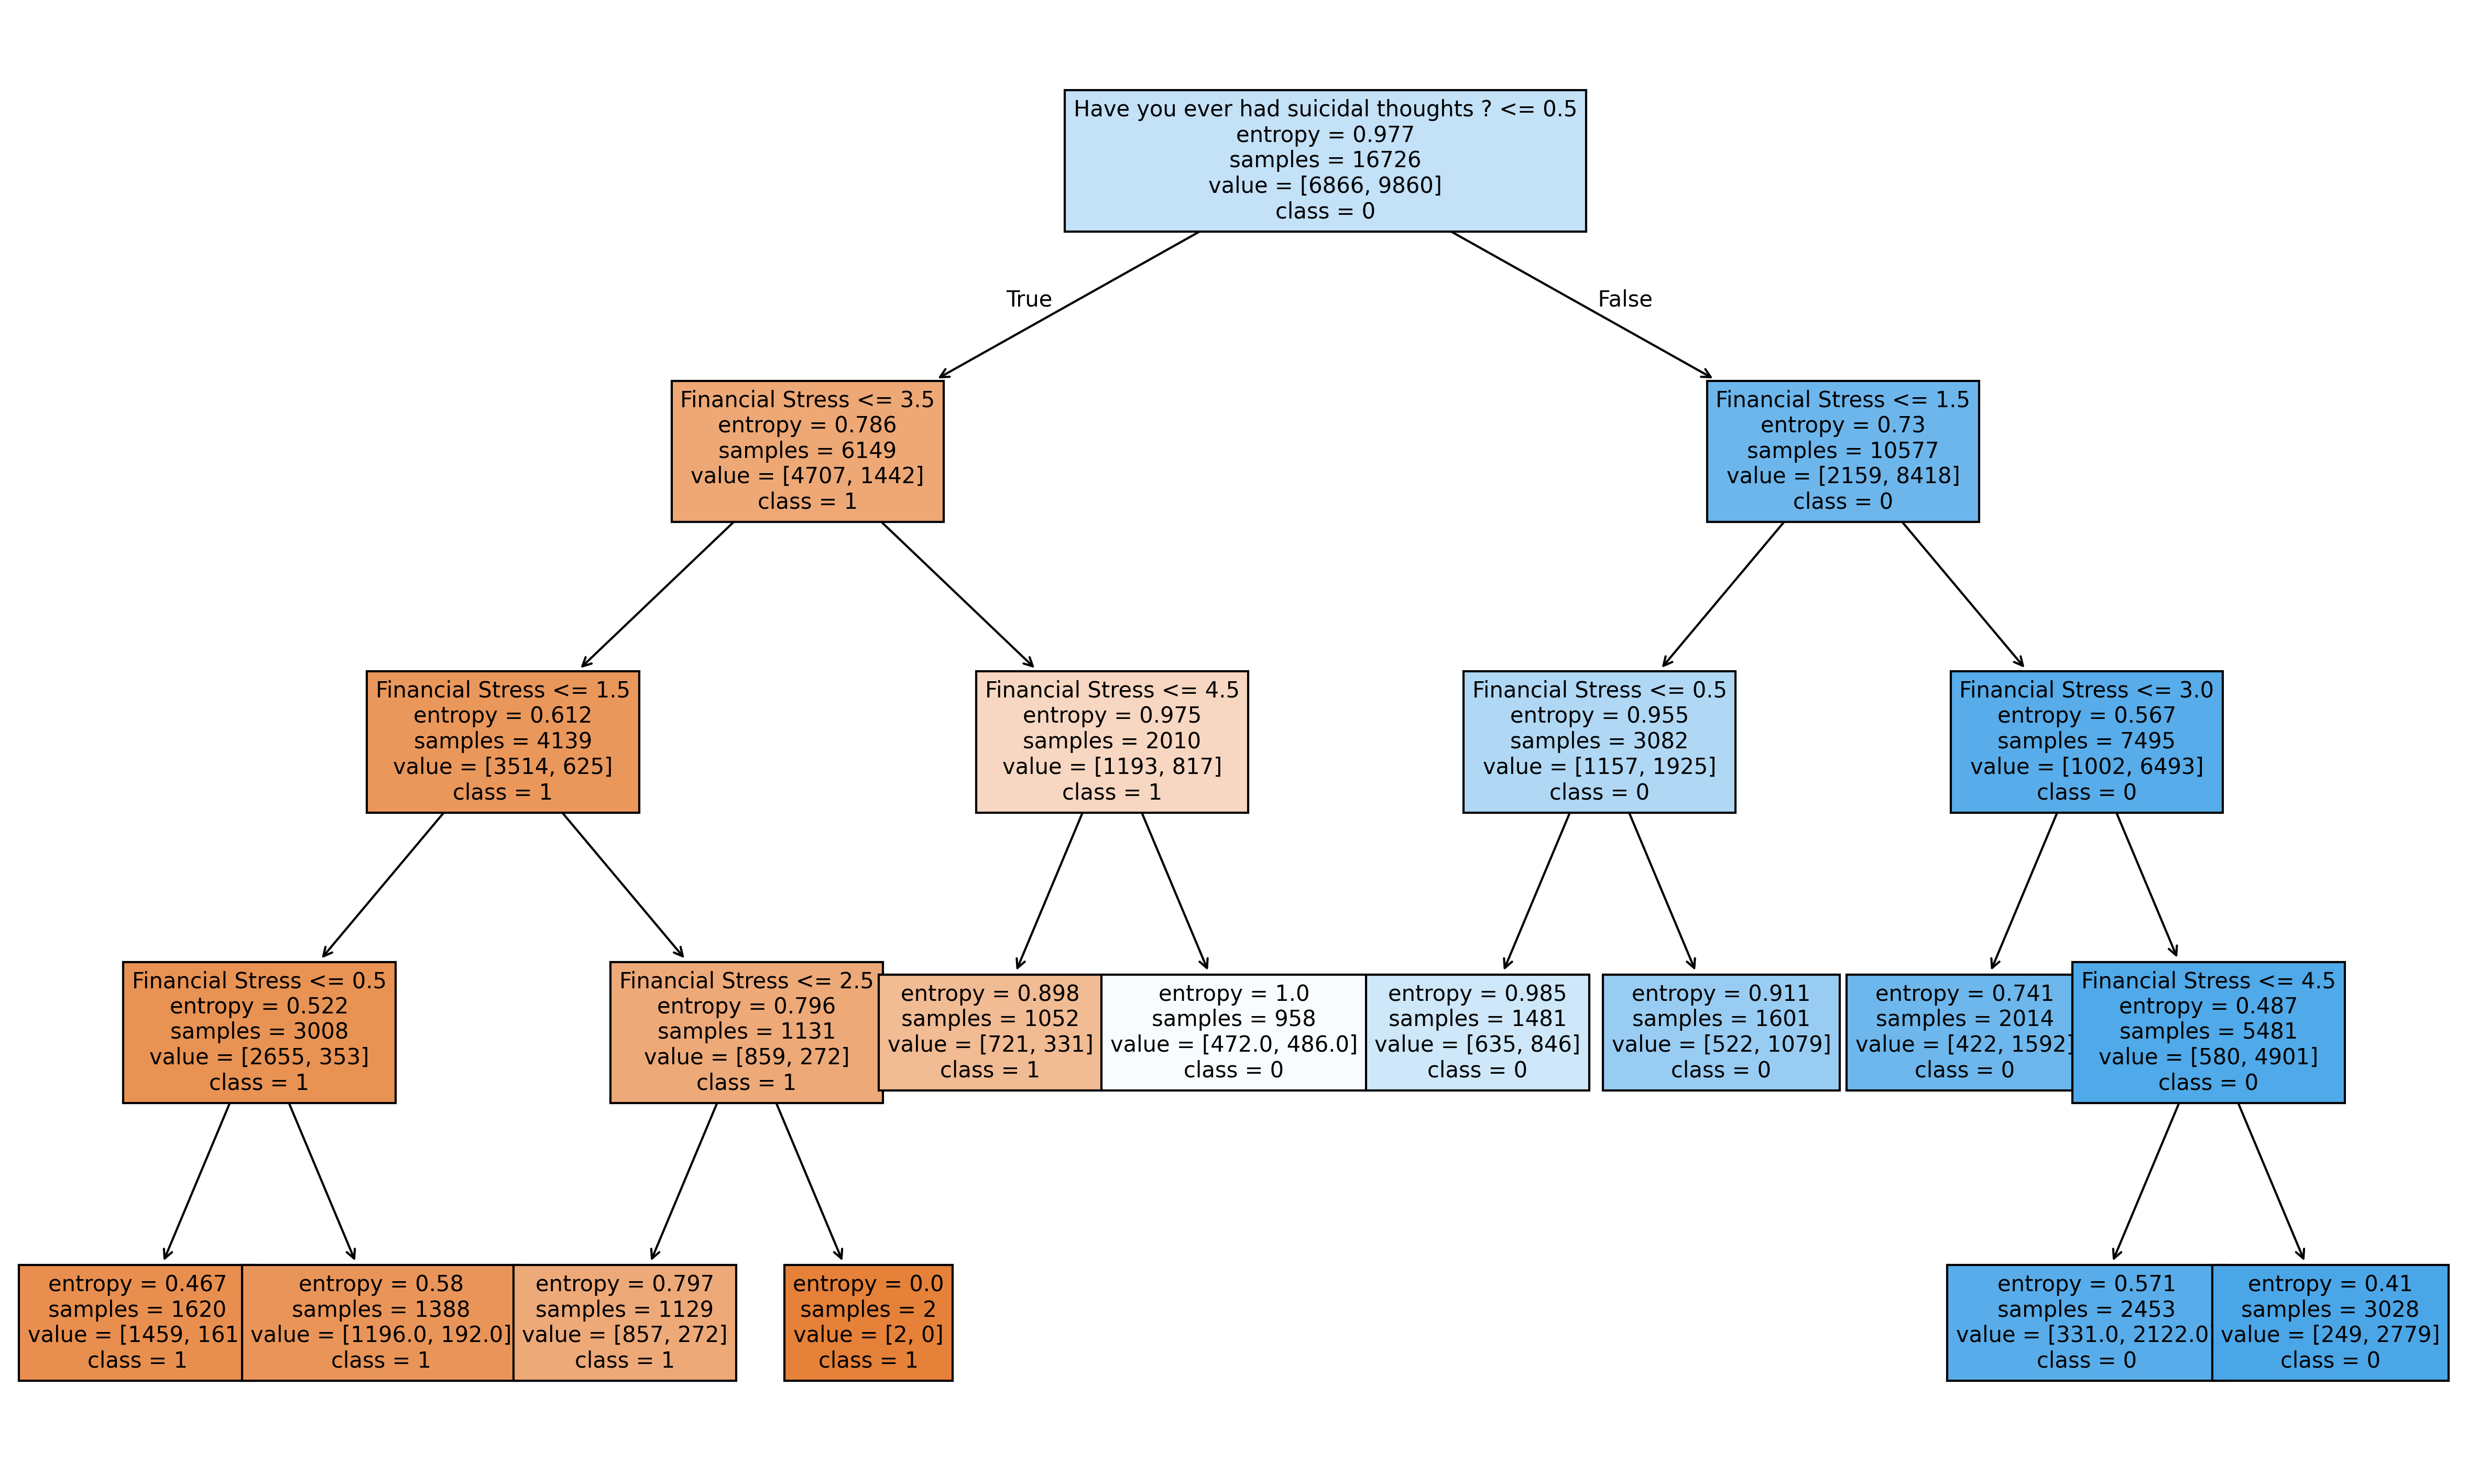

In [61]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 12), dpi=300)
tree.plot_tree(clf_40, feature_names=fn, class_names=cn, filled=True, fontsize=10)
fig.savefig('Depression_tree_40.png')
plt.show()


In [63]:
filename = 'depression_model_dtE.sav'
pickle.dump(clf_30, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))

predections = loaded_model.predict(X_test_30)

print("predection for test data set: \n",predections)


new_values = np.array([
    [1.0, 0.0],  # person with suicidal thoughts, no financial stress
    [0.0, 3.0],  # no suicidal thoughts, moderate financial stress
    [1.0, 5.0]   # suicidal thoughts and high financial stress
])


new_values_df = pd.DataFrame(new_values, columns=fn)

predictions = loaded_model.predict(new_values_df)
print("\n\nPredictions for new values: \n",predictions)


predection for test data set: 
 [1 0 1 ... 1 1 1]


Predictions for new values: 
 [1 0 1]


### Summary of Decision Tree (Entropy) Results

To evaluate the performance of the decision tree classifier using Information Gain (Entropy), three train-test splits were used: 80/20, 70/30, and 60/40.

- **80/20 Split:** Achieved an accuracy of **78.10%**. This configuration had the highest performance among the three splits.
- **70/30 Split:** Accuracy was **77.69%**, slightly lower than 80/20, with a moderate drop in classification precision.
- **60/40 Split:** Produced an accuracy of **77.30%**, showing further decline as the training set decreased.

The confusion matrices suggest that all models performed consistently in classifying both classes, with a reasonable balance between true positives and true negatives. However, the **80/20 split provided the most balanced and accurate results**, indicating that having more training data helped improve generalization without sacrificing test performance.

Overall, the decision tree using entropy handled the classification task effectively, with **80/20 as the optimal partition** based on accuracy and confusion matrix evaluation.
